# Exploratory Data Analysis

## Class Notebook 2

## Data

Recall that the $2$ key questions for analyses of data in statistics are:

- Shape?
- Outliers/skew?

The most important distribution for introductory statistics is the normal (or bell-shaped) distribution since parametric statistical tests ($z$-test, $t$-test, and ANOVA) are built on assumpmtions of **normality**. Skew and outliers must be treated with care and, possibly, different tools. The first steps of data analysis are to generate numeric descriptions of the data (descriptive statistics) and typical graphical displays of data like histograms or stem plots.

We already showed how to read in data from an Excel file stored online. Let's use the data from this table which are the win/loss totals from Mandy's most recent 20 cash poker sessions:

<table style="width:50%">
  <tr>
    <td>28</td>
    <td>11</td>
    <td>18</td>
    <td>35</td>
    <td>36</td>
    <td>6</td>
    <td>-38</td>
    <td>14</td>
    <td>-19</td>
    <td>43</td>
  </tr>
  <tr>
    <td>-14</td>
    <td>-30</td>
    <td>-16</td>
    <td>-25</td>
    <td>0</td>
    <td>40</td>
    <td>16</td>
    <td>-79</td>
    <td>3</td>
    <td>11</td>
  </tr>
</table>

To enter data mually from a list, we use the concatentate function **c** as follows:

In [2]:
W <- c( 28, 11, 18, 35, 36, 6, -38, 14, -19, 43, -14, -30, -16, -25, 0, 40, 16, -79, 3, 11)

We can use the **head** function to see the top few rows of a table or the first few entries of a vector:

In [3]:
# Displays the first four entries

head(W,4)

[1] 28 11 18 35

## Types of Data

Data come in two varieties: **quantitative** (numeric) or **qualitative** (categorical) data. Poker player Pete plays online tournaments with a $20 buy-in. These tournaments are 1-vs-1 (or "heads up" in poker parlance), so he either doubles his money or loses it all. Pete’s win-loss record is category data, a series of W’s and L’s.

Clearly, this is numeric data which has a rather standard set of descriptive statistics we need to calculate and display.

## Descriptive Statistics

We will use the functions we used in lesson 1 to get, first, the standard summary statistics:

- mean
- standard deviation
- sample size

Then we will display the 5-Number Summary. Note that, below, we use the function **length** to determine the sample size and also show how to use the **round** function.

In [12]:
m <- mean(W)
s <- round(sd(W),2)
n <- length(W)

In [13]:
cat ("Descriptive Statistics: \n  Mean =", m, "\n  Standard deviation =", s, "\n  Sample size", n, "\n\nThe 5-number summary:")
summary(W)

Descriptive Statistics: 
  Mean = 2 
  Standard deviation = 30.57 
  Sample size 20 

The 5-number summary:

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 -79.00  -16.75    8.50    2.00   20.50   43.00 

## Visualizations

For single variable data, we tend to look first at a histogram, then perhaps a boxplot.

### Histogram

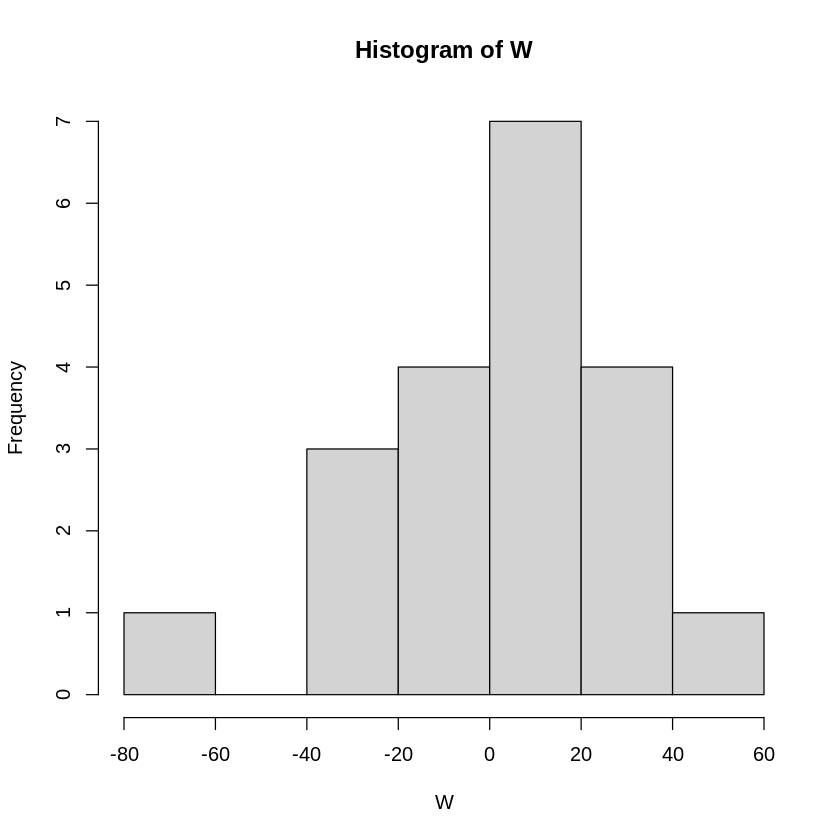

In [17]:
hist(W)

Given the standard histogram above, recall that this display often needs different bin widths to display more accurately the shape of the distribution. Working in the blank cells below, add the option **breaks = n** to the histogram above. Try things like n = 5, 10, 15, and 20 to see which version provides the best display.

### Box Plot

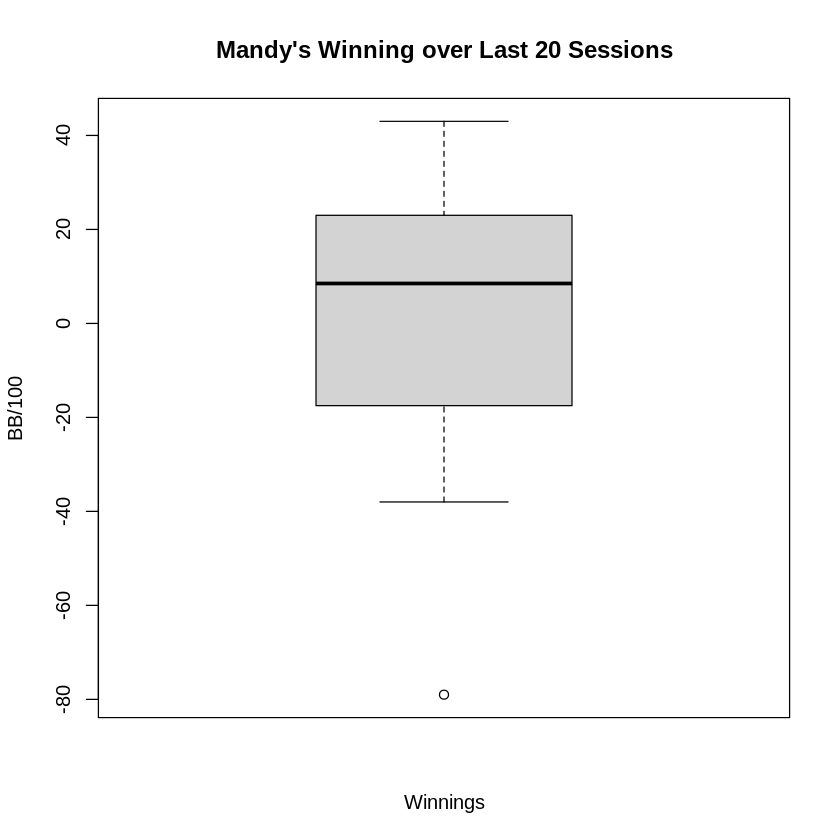

In [20]:
boxplot(W,
  main = "Mandy's Winning over Last 20 Sessions",
  xlab = "Winnings",
  ylab = "BB/100")

### What do these visualizations tell us?

We can see

1. Approximately normal distribution (e.g. bell-shaped)
2. Skew to the left
3. Outlier to left

Your skills of analyzing these graphical displays will improve with practice.

### Stem Plots

An interesting hybrid visualization shows the shape of the data while displaying all the data.

In [31]:
stem(W)


  The decimal point is 2 digit(s) to the right of the |

  -0 | 8
  -0 | 433221
   0 | 0011112234444



The display is too cramped to see much, so we use the option **scale** to split stems:

In [32]:
stem(W, scale = 2)


  The decimal point is 1 digit(s) to the right of the |

  -6 | 9
  -4 | 
  -2 | 805
  -0 | 964
   0 | 03611468
   2 | 856
   4 | 03



Using $scale = 1$ is the default R stem plot. In the space below, try different **scale** settings like 1.5, 2.5 and 3. Decide which you think displays the distribution of the data best. Which one is easiest to read?

### Outliers and Standard Deviation

Because the standard deviation measures distances in a data set, we can check for outliers using it. For small data sets, where $n\leq 50$, any data point more than two standard deviations from the mean may be considered an outlier. We have the data in R, so let’s use some quick code to determine the cutoff values at which we would consider a data point an outlier. The R functions **mean** and **sd** will be needed for their obvious purposes.

In [55]:
right = mean(W) + 2 * sd(W)
left = mean(W) - 2 * sd(W)

In [56]:
# Lower cutoff for outliers

left

[1] -59.14693

In [57]:
# Upper cutoff for outliers

right

[1] 63.14693

We can use R to check if any outliers exist:

In [58]:
W < left

[1] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[13] FALSE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE

We can convert the TRUE and FALSE data to 0's and 1's like this:

In [59]:
( W < left ) * 1

[1] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0

We can determine the number of outliers in a larger data set like this:

In [60]:
sum( ( W < left ) * 1 )

[1] 1

Use the code blocks below to check for outliers to the right and to practice these commands.

### Outliers and the 5-Number Summary

A box plot requires the 5-Number Summary, so we use the IQR (inner-quartile range) detect outliers. IQR is the distance between Q1 and Q3:

$$\text{IQR}=\text{Q3}−\text{Q1}$$

Then the box plot uses the following calculations for the fences (or cutoff values):

- Upper Fence = Q3 + 1.5 * IQR
- Lower Fence = Q1 − 1.5 * IQR

You should be able to detect outliers using either method both by hand and with statistical software like R.

## Visualization Example: Old Faithful Geyser

R has preloaded data sets like faithful, a data frame with two variables: eruptions and waiting. Both are time variables. Eruptions is number of seconds the eruptions lasted. Waiting is the time interval between eruptions. By just typing the name of the data frame, R will print out a preview. Again, we will use the **head** function to print a preview rather than the entire 272 rows of data:

In [63]:
head(faithful, 7)

,eruptions,waiting
,<dbl>,<dbl>
1,3.600,79
2,1.800,54
3,3.333,74
4,2.283,62
5,4.533,85
6,2.883,55
7,4.700,88


### Two Variable Plots

One might wonder if longer waiting times correlate with longer eruptions. Perhaps more pressure builds up, then when released the eruptions last longer. Let’s check a scatter plot. The first argument is the form y∼x. The y-variable is the dependent variable, the x-variable independent. In this setup, we are implicitly suggesting that the variable eruptions depends upon the variable waiting. If we reverse the order, we reverse the implicit dependence.

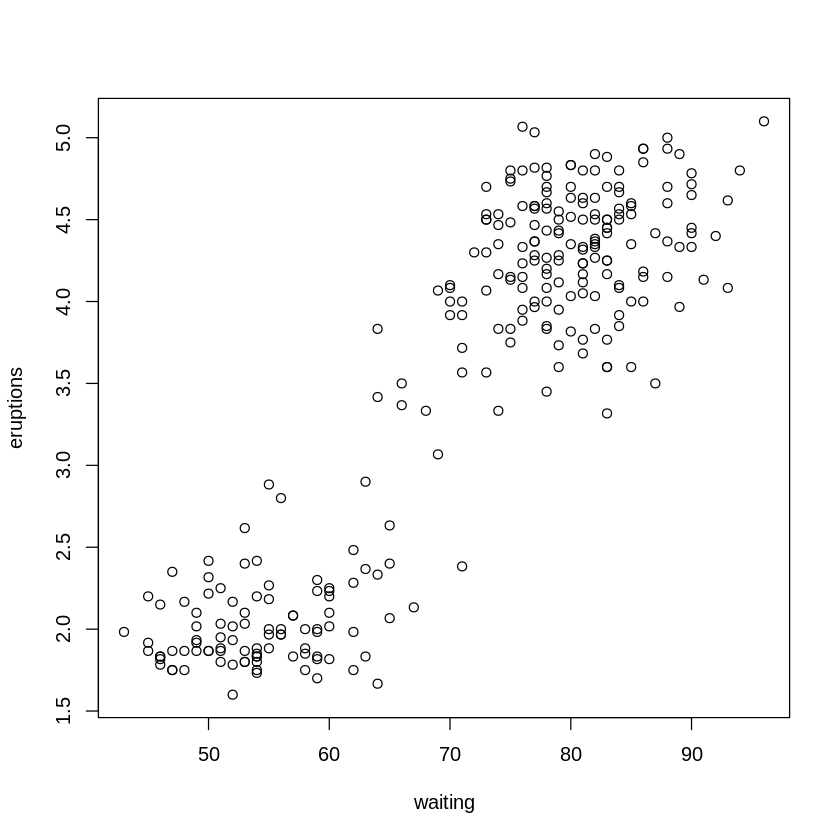

In [64]:
plot(eruptions ~ waiting, data = faithful)

There does seem to be a positive association here.

## Data Analysis Example with Births

We will need to read in the data from a URL. The original data is from the *mosaic* package in R. I have a copy linked on my faculty web page.

In [83]:
bd <- read.csv('https://faculty.ung.edu/rsinn/Births78.csv')
head(b)

,rownames,date,births,wday,year,month,day_of_year,day_of_month,day_of_week
,<int>,<chr>,<int>,<chr>,<int>,<int>,<int>,<int>,<int>
1,1,1978-01-01,7701,Sun,1978,1,1,1,1
2,2,1978-01-02,7527,Mon,1978,1,2,2,2
3,3,1978-01-03,8825,Tue,1978,1,3,3,3
4,4,1978-01-04,8859,Wed,1978,1,4,4,4
5,5,1978-01-05,9043,Thu,1978,1,5,5,5
6,6,1978-01-06,9208,Fri,1978,1,6,6,6


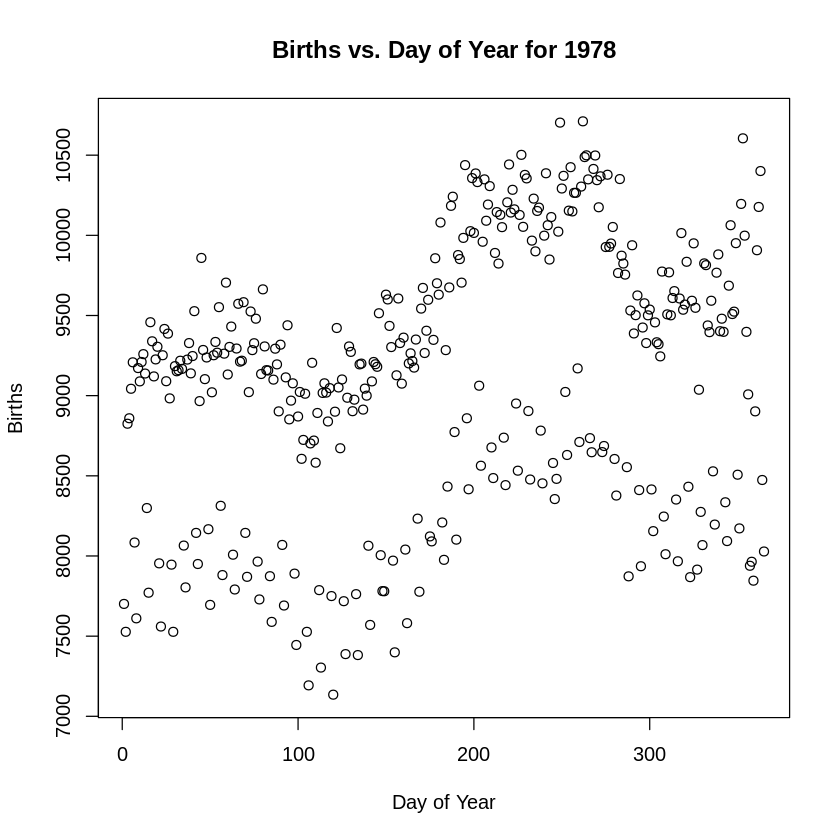

In [86]:
plot(births ~ day_of_year, data = bd,
       main = "Births vs. Day of Year for 1978",
       xlab = "Day of Year",
       ylab = "Births")